In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('test.csv', index_col='id')

In [3]:
df.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
24034,39,unemployed,married,basic.9y,NaN,no,yes,cellular,nov,tue,530,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no
37051,63,admin.,married,university.degree,no,yes,no,cellular,jul,fri,396,2,999,0,nonexistent,-1.7,94.215,-40.3,0.885,4991.6,yes
32958,55,NaN,married,NaN,NaN,yes,no,cellular,aug,fri,103,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,no
26613,54,admin.,married,university.degree,no,yes,no,cellular,aug,tue,243,3,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
24498,25,blue-collar,married,basic.9y,no,no,no,telephone,may,fri,483,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
31965,51,management,married,basic.4y,no,no,no,cellular,nov,mon,96,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no
9823,36,blue-collar,single,basic.4y,no,no,yes,cellular,may,thu,178,3,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,no
6116,43,blue-collar,married,basic.4y,no,no,no,cellular,may,mon,465,2,999,0,nonexistent,-1.8,92.893,-46.2,1.244,5099.1,no
29837,35,student,single,university.degree,no,yes,no,cellular,oct,tue,79,2,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37069 non-null  int64  
 1   job             36773 non-null  object 
 2   marital         37000 non-null  object 
 3   education       35505 non-null  object 
 4   default         29296 non-null  object 
 5   housing         36176 non-null  object 
 6   loan            36176 non-null  object 
 7   contact         37069 non-null  object 
 8   month           37069 non-null  object 
 9   day_of_week     37069 non-null  object 
 10  duration        37069 non-null  int64  
 11  campaign        37069 non-null  int64  
 12  pdays           37069 non-null  int64  
 13  previous        37069 non-null  int64  
 14  poutcome        37069 non-null  object 
 15  emp.var.rate    37069 non-null  float64
 16  cons.price.idx  37069 non-null  float64
 17  cons.conf.idx   37069 non-null 

In [5]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000,37069.000000
mean,40.023497,258.185492,2.566862,962.058189,0.173946,0.082222,93.576416,-40.505555,3.620484,5166.966047
std,10.412653,259.579105,2.765626,187.939691,0.497441,1.571009,0.578585,4.623600,1.735310,72.360902
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,36773,37000,35505,29296,36176,36176,37069,37069,37069,37069,37069
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,9364,22424,10967,29293,19432,30518,23515,12424,7735,31989,32893


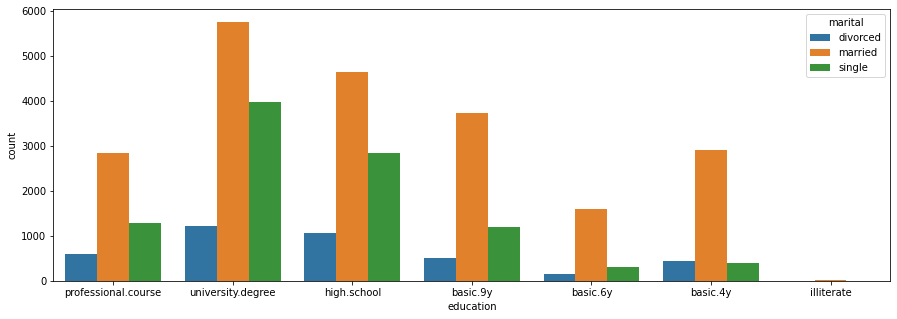

In [7]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='education', hue='marital')
plt.show()

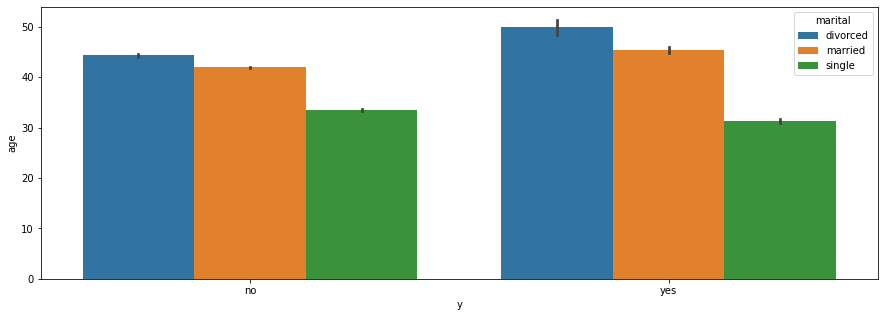

In [8]:
plt.figure(figsize=(15,5))
sns.barplot(data=df, x='y', y='age', hue='marital')
plt.show()

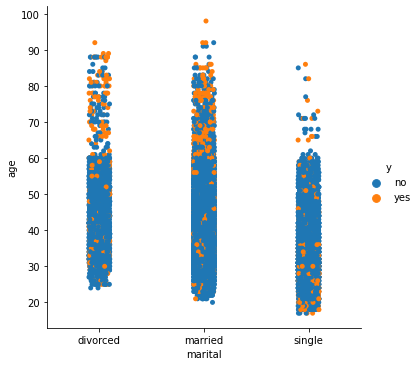

In [9]:
sns.catplot(data=df, x='marital', y='age', hue='y', jitter=1)
plt.show()

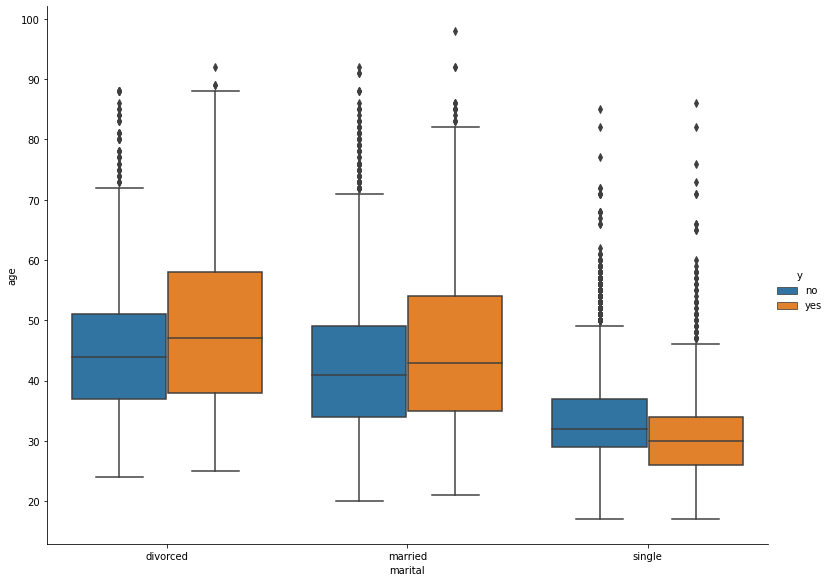

In [10]:
sns.catplot(data=df, x='marital', y='age', hue='y', kind='box', height=8, aspect=8/6)

In [11]:
df[df.duration<=1].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,48.000000,0.428571,3.142857,857.571429,0.571429,-0.728571,93.554143,-41.128571,2.259714,5091.942857
std,14.189198,0.534522,3.236694,374.184828,1.133893,1.390101,0.567678,5.338762,1.827621,101.199915
min,31.000000,0.000000,1.000000,9.000000,0.000000,-1.800000,92.893000,-47.100000,0.879000,4963.600000
25%,38.500000,0.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-46.650000,1.092500,5031.350000
50%,44.000000,0.000000,2.000000,999.000000,0.000000,-1.100000,93.444000,-37.500000,1.453000,5099.100000
75%,56.000000,1.000000,3.500000,999.000000,0.500000,0.000000,94.096500,-36.950000,3.168000,5145.050000
max,72.000000,1.000000,10.000000,999.000000,3.000000,1.400000,94.199000,-36.100000,4.965000,5228.100000


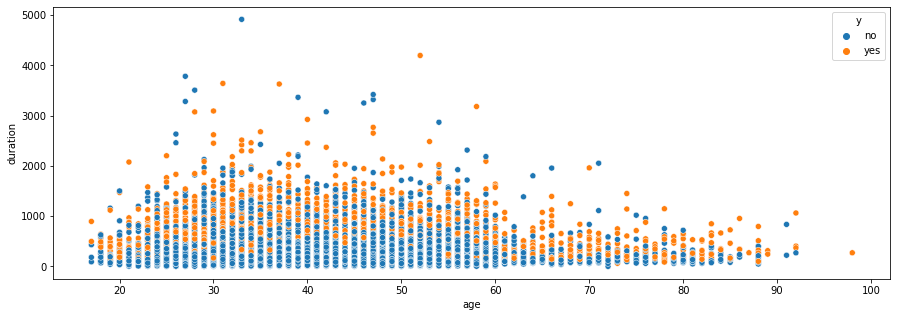

In [12]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=df, x='age', y='duration', hue='y')
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.externals import joblib
from sklearn import metrics

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [14]:
for c in df.columns[df.dtypes == object]:
    df[c] = df[c].astype('category')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37069 entries, 0 to 37068
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             37069 non-null  int64   
 1   job             36773 non-null  category
 2   marital         37000 non-null  category
 3   education       35505 non-null  category
 4   default         29296 non-null  category
 5   housing         36176 non-null  category
 6   loan            36176 non-null  category
 7   contact         37069 non-null  category
 8   month           37069 non-null  category
 9   day_of_week     37069 non-null  category
 10  duration        37069 non-null  int64   
 11  campaign        37069 non-null  int64   
 12  pdays           37069 non-null  int64   
 13  previous        37069 non-null  int64   
 14  poutcome        37069 non-null  category
 15  emp.var.rate    37069 non-null  float64 
 16  cons.price.idx  37069 non-null  float64 
 17  cons.conf.id

In [16]:
jobs = df.job.cat.categories

In [17]:
for c in jobs:
    print(c)

admin.
blue-collar
entrepreneur
housemaid
management
retired
self-employed
services
student
technician
unemployed


In [18]:
df.job.cat.codes

id
0        9
1        4
2        1
3        1
4        3
        ..
37064    7
37065    9
37066    0
37067    0
37068    0
Length: 37069, dtype: int8

In [19]:
df.education.cat.reorder_categories(['illiterate', 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 
       'professional.course', 'university.degree'], ordered=True, inplace=True)

In [20]:
for c in df.columns[df.dtypes == 'category']:
    df[c] = df[c].cat.codes

In [21]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
id,,,,,,,,,,,,,,,,,,,,,
0,52,9,0,5,-1,1,0,1,4,1,56,8,999,0,1,1.4,94.465,-41.8,4.865,5228.1,0
1,36,4,1,6,0,1,0,0,7,3,267,2,999,0,1,-0.1,93.200,-42.0,4.153,5195.8,0
2,53,1,1,4,0,1,1,0,3,1,243,2,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
3,45,1,2,3,0,1,0,0,1,4,249,1,4,1,2,-2.9,92.201,-31.4,0.879,5076.2,0
4,60,3,1,4,-1,1,0,1,6,4,74,1,999,0,1,1.1,93.994,-36.4,4.858,5191.0,0


In [22]:
y = df.y
X = df.drop('y', axis=1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42, shuffle=True, stratify=y)

In [24]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((31508, 20), (5561, 20), (31508,), (5561,))

In [25]:
sum(y_train)/len(y_train), sum(y_test)/len(y_test)

(0.11266979814650248, 0.11256968171192232)

In [26]:
sum(y_test)/len(y_test)

0.11256968171192232

In [27]:
scaler = MinMaxScaler()
X_ = scaler.fit_transform(X)

In [28]:
df2 = pd.DataFrame(X_, columns=df.columns.drop('y'))


In [29]:
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.432099,0.909091,0.333333,0.857143,0.0,1.0,0.5,1.0,0.444444,0.25,0.011387,0.127273,1.000000,0.000000,0.5,1.000000,0.882307,0.376569,0.959193,1.000000
1,0.234568,0.454545,0.666667,1.000000,0.5,1.0,0.5,0.0,0.777778,0.75,0.054290,0.018182,1.000000,0.000000,0.5,0.687500,0.389322,0.368201,0.797778,0.877883
2,0.444444,0.181818,0.666667,0.714286,0.5,1.0,1.0,0.0,0.333333,0.25,0.049410,0.018182,1.000000,0.000000,0.5,1.000000,0.669135,0.338912,0.981183,1.000000
3,0.345679,0.181818,1.000000,0.571429,0.5,1.0,0.5,0.0,0.111111,1.00,0.050630,0.000000,0.004004,0.142857,1.0,0.104167,0.000000,0.811715,0.055543,0.425709
4,0.530864,0.363636,0.666667,0.714286,0.0,1.0,0.5,1.0,0.666667,1.00,0.015047,0.000000,1.000000,0.000000,0.5,0.937500,0.698753,0.602510,0.957606,0.859735


In [32]:
kmn_class = KNeighborsClassifier()
kmn_class.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
y_pred = kmn_class.predict(X_test)

In [34]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4935
           1       0.59      0.52      0.55       626

    accuracy                           0.90      5561
   macro avg       0.76      0.73      0.75      5561
weighted avg       0.90      0.90      0.90      5561

